# Using Genestack Omics APIs for differential expression analysis

### 1. Connect to the instance

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
# Genestack client library
import integration_curator

os.environ['PRED_SPOT_HOST'] = 'occam.genestack.com'
os.environ['PRED_SPOT_TOKEN'] = '<your API token>'

omics_api = integration_curator.OmicsQueriesApi()

### 2. Get samples

In [2]:
study_name = 'GTEXv7'
sample_field = 'GTEX original SMTS'
sample_values = ['Prostate', 'Breast', 'Salivary Gland']
sample_filter = ' OR '.join(['"%s"="%s"' % (sample_field, sample_value) 
                             for sample_value in sample_values])

data = omics_api.search_samples(
    study_filter='genestack:name="%s"' % study_name, 
    sample_filter=sample_filter
)
samples = pd.DataFrame.from_dict([item['metadata'] for item in data.data])
samples[['genestack:accession', sample_field]].head()

,genestack:accession,GTEX original SMTS
0,GSF496314,Prostate
1,GSF497076,Breast
2,GSF495280,Breast
3,GSF495050,Salivary Gland
4,GSF495820,Breast


### 3. Get expression data

In [3]:
gene = 'ENSG00000014257.11'

data = omics_api.search_expression_data(
    study_filter='genestack:name="%s"' % study_name,
    sample_filter=sample_filter,
    ex_query='Gene=%s MinValue=0.0' % gene
)
expressions = pd.DataFrame.from_dict({'genestack:accession': item['relationships']['sample'], 
                                      'expression': item['expression']} for item in data.data)
expressions.head()

,expression,genestack:accession
0,71.0,GSF495048
1,399.0,GSF495050
2,92804.0,GSF495067
3,273103.0,GSF495086
4,1038.0,GSF495088


### 4. Differential expression plot

Text(0.5,0,'Tissue')

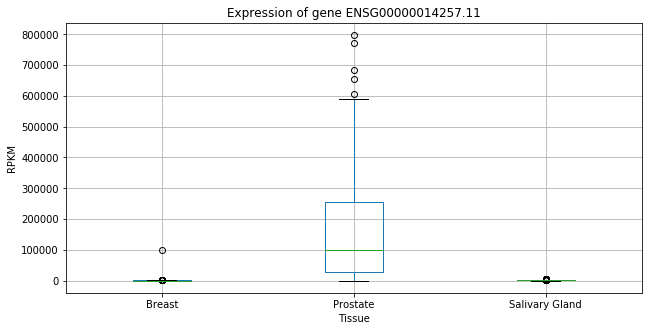

In [4]:
samples_expressions = pd.merge(samples, expressions)
samples_expressions.boxplot('expression', sample_field, rot=0, figsize=(10,5))
plt.suptitle('')
plt.title('Expression of gene %s' % gene)
plt.ylabel('RPKM')
plt.xlabel('Tissue')